<a href="https://colab.research.google.com/github/Medona-Jugi-P/Anomaly-Detection-in-Water-Quality/blob/main/waterquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
with open("/content/drive/MyDrive/Colab Notebooks/Anomaly_Detection/water-treatment.names", "r") as f:
    lines = f.readlines()
    for line in lines:
        print(line)


1. Title: Faults in a urban waste water treatment plant





2. Relevant Information:



    This dataset comes from the daily measures of sensors in a urban waste 

  water treatment plant. The objective is to classify the operational

  state of the plant in order to predict faults through the state 

  variables of the plant at each of the stages of the treatment process. 

  This domain has been stated as an ill-structured domain. 

   

  

3. Number of instances: 527



4. Number of Attributes: 13



    There are some missing values, all are unknown information.



5. Attribute Information:



 All atrributes are numeric and continuous



N.  Attrib.      

 1  ZN-E       (input Zinc to plant)

 2  PH-E       (input pH to plant) 

 3  SS-E       (input suspended solids to plant)  

 4  SSV-E      (input volatile supended solids to plant)

 5  SED-E      (input sediments to plant) 

 6  COND-E     (input conductivity to plant) 

 7  PH-P       (input pH to primary settler)

 8  P

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Anomaly_Detection/WaterTreatment.csv")
df

,ZN-E,PH-E,SS-E,SSV-E,SED-E,COND-E,PH-P,PH-D,PH-S,SS-S,SSV-S,SED-S,COND-S,SAFE
0,8.70,7.5,274,46.0,?,1186,7.3,7.1,7.0,18,83.3,?,1272,1
1,8.50,7.5,240,55.0,3.8,1087,7.5,7.5,7.1,17,94.1,0.00,1223,1
2,1.00,7.7,150,53.3,?,1509,7.7,7.6,7.2,10,72.0,?,1548,1
3,1.50,7.8,166,66.3,4.5,2110,7.9,7.9,7.3,21,81.0,0.02,2000,1
4,1.20,7.4,252,61.1,7.0,1533,7.4,7.4,7.3,20,82.5,0.00,1402,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.80,8.0,160,67.5,2.5,1096,7.9,7.9,8.1,15,66.7,0.00,1061,0
523,2.00,8.1,268,47.8,3.5,1732,8.0,8.0,8.2,17,77.6,0.00,1643,0
524,0.70,8.1,144,?,1.3,1581,8.3,8.3,8.3,13,?,0.00,1720,0
525,1.99,8.0,208,74.0,5.3,1585,8.0,7.9,9.7,17,88.2,0.02,1708,0


In [4]:
#check data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZN-E    527 non-null    object 
 1   PH-E    527 non-null    float64
 2   SS-E    527 non-null    object 
 3   SSV-E   527 non-null    object 
 4   SED-E   527 non-null    object 
 5   COND-E  527 non-null    int64  
 6   PH-P    527 non-null    float64
 7   PH-D    527 non-null    float64
 8   PH-S    527 non-null    object 
 9   SS-S    527 non-null    object 
 10  SSV-S   527 non-null    object 
 11  SED-S   527 non-null    object 
 12  COND-S  527 non-null    object 
 13  SAFE    527 non-null    int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 57.8+ KB


In [5]:
#replacing ? with NaN 
df.replace('?', np.nan, inplace=True)

In [6]:
# convert the 'A' column from object to float
df = df.astype(float)

In [7]:
# Checking for the missing values after replacing ?
count_NaN = df.isna().sum()
count_NaN

ZN-E       3
PH-E       0
SS-E       1
SSV-E     11
SED-E     25
COND-E     0
PH-P       0
PH-D       0
PH-S       1
SS-S       5
SSV-S     17
SED-S     28
COND-S     1
SAFE       0
dtype: int64

In [8]:
df

,ZN-E,PH-E,SS-E,SSV-E,SED-E,COND-E,PH-P,PH-D,PH-S,SS-S,SSV-S,SED-S,COND-S,SAFE
0,8.70,7.5,274.0,46.0,NaN,1186.0,7.3,7.1,7.0,18.0,83.3,NaN,1272.0,1.0
1,8.50,7.5,240.0,55.0,3.8,1087.0,7.5,7.5,7.1,17.0,94.1,0.00,1223.0,1.0
2,1.00,7.7,150.0,53.3,NaN,1509.0,7.7,7.6,7.2,10.0,72.0,NaN,1548.0,1.0
3,1.50,7.8,166.0,66.3,4.5,2110.0,7.9,7.9,7.3,21.0,81.0,0.02,2000.0,1.0
4,1.20,7.4,252.0,61.1,7.0,1533.0,7.4,7.4,7.3,20.0,82.5,0.00,1402.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.80,8.0,160.0,67.5,2.5,1096.0,7.9,7.9,8.1,15.0,66.7,0.00,1061.0,0.0
523,2.00,8.1,268.0,47.8,3.5,1732.0,8.0,8.0,8.2,17.0,77.6,0.00,1643.0,0.0
524,0.70,8.1,144.0,NaN,1.3,1581.0,8.3,8.3,8.3,13.0,NaN,0.00,1720.0,0.0
525,1.99,8.0,208.0,74.0,5.3,1585.0,8.0,7.9,9.7,17.0,88.2,0.02,1708.0,0.0


In [9]:
# drop rows with missing values
df.dropna(inplace=True)
df

,ZN-E,PH-E,SS-E,SSV-E,SED-E,COND-E,PH-P,PH-D,PH-S,SS-S,SSV-S,SED-S,COND-S,SAFE
1,8.50,7.5,240.0,55.0,3.8,1087.0,7.5,7.5,7.1,17.0,94.1,0.00,1223.0,1.0
3,1.50,7.8,166.0,66.3,4.5,2110.0,7.9,7.9,7.3,21.0,81.0,0.02,2000.0,1.0
4,1.20,7.4,252.0,61.1,7.0,1533.0,7.4,7.4,7.3,20.0,82.5,0.00,1402.0,1.0
5,2.00,7.6,188.0,60.6,4.5,1301.0,7.6,7.6,7.3,20.0,70.0,0.00,1262.0,1.0
6,3.50,7.5,504.0,45.2,7.3,1016.0,7.5,7.5,7.3,25.0,72.0,0.05,1164.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,1.25,7.7,168.0,54.8,3.5,1814.0,7.9,8.1,8.1,15.0,73.3,0.00,1879.0,0.0
521,0.30,8.1,172.0,40.7,2.0,1350.0,8.0,7.9,8.1,14.0,80.0,0.00,1400.0,0.0
522,0.80,8.0,160.0,67.5,2.5,1096.0,7.9,7.9,8.1,15.0,66.7,0.00,1061.0,0.0
523,2.00,8.1,268.0,47.8,3.5,1732.0,8.0,8.0,8.2,17.0,77.6,0.00,1643.0,0.0


In [10]:
# Checking for the missing values after droping NaN
count_NaN = df.isna().sum()
count_NaN

ZN-E      0
PH-E      0
SS-E      0
SSV-E     0
SED-E     0
COND-E    0
PH-P      0
PH-D      0
PH-S      0
SS-S      0
SSV-S     0
SED-S     0
COND-S    0
SAFE      0
dtype: int64

In [11]:
print(df.columns)

Index(['ZN-E', 'PH-E', 'SS-E', 'SSV-E ', 'SED-E', 'COND-E', 'PH-P', 'PH-D',
       'PH-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'SAFE'],
      dtype='object')


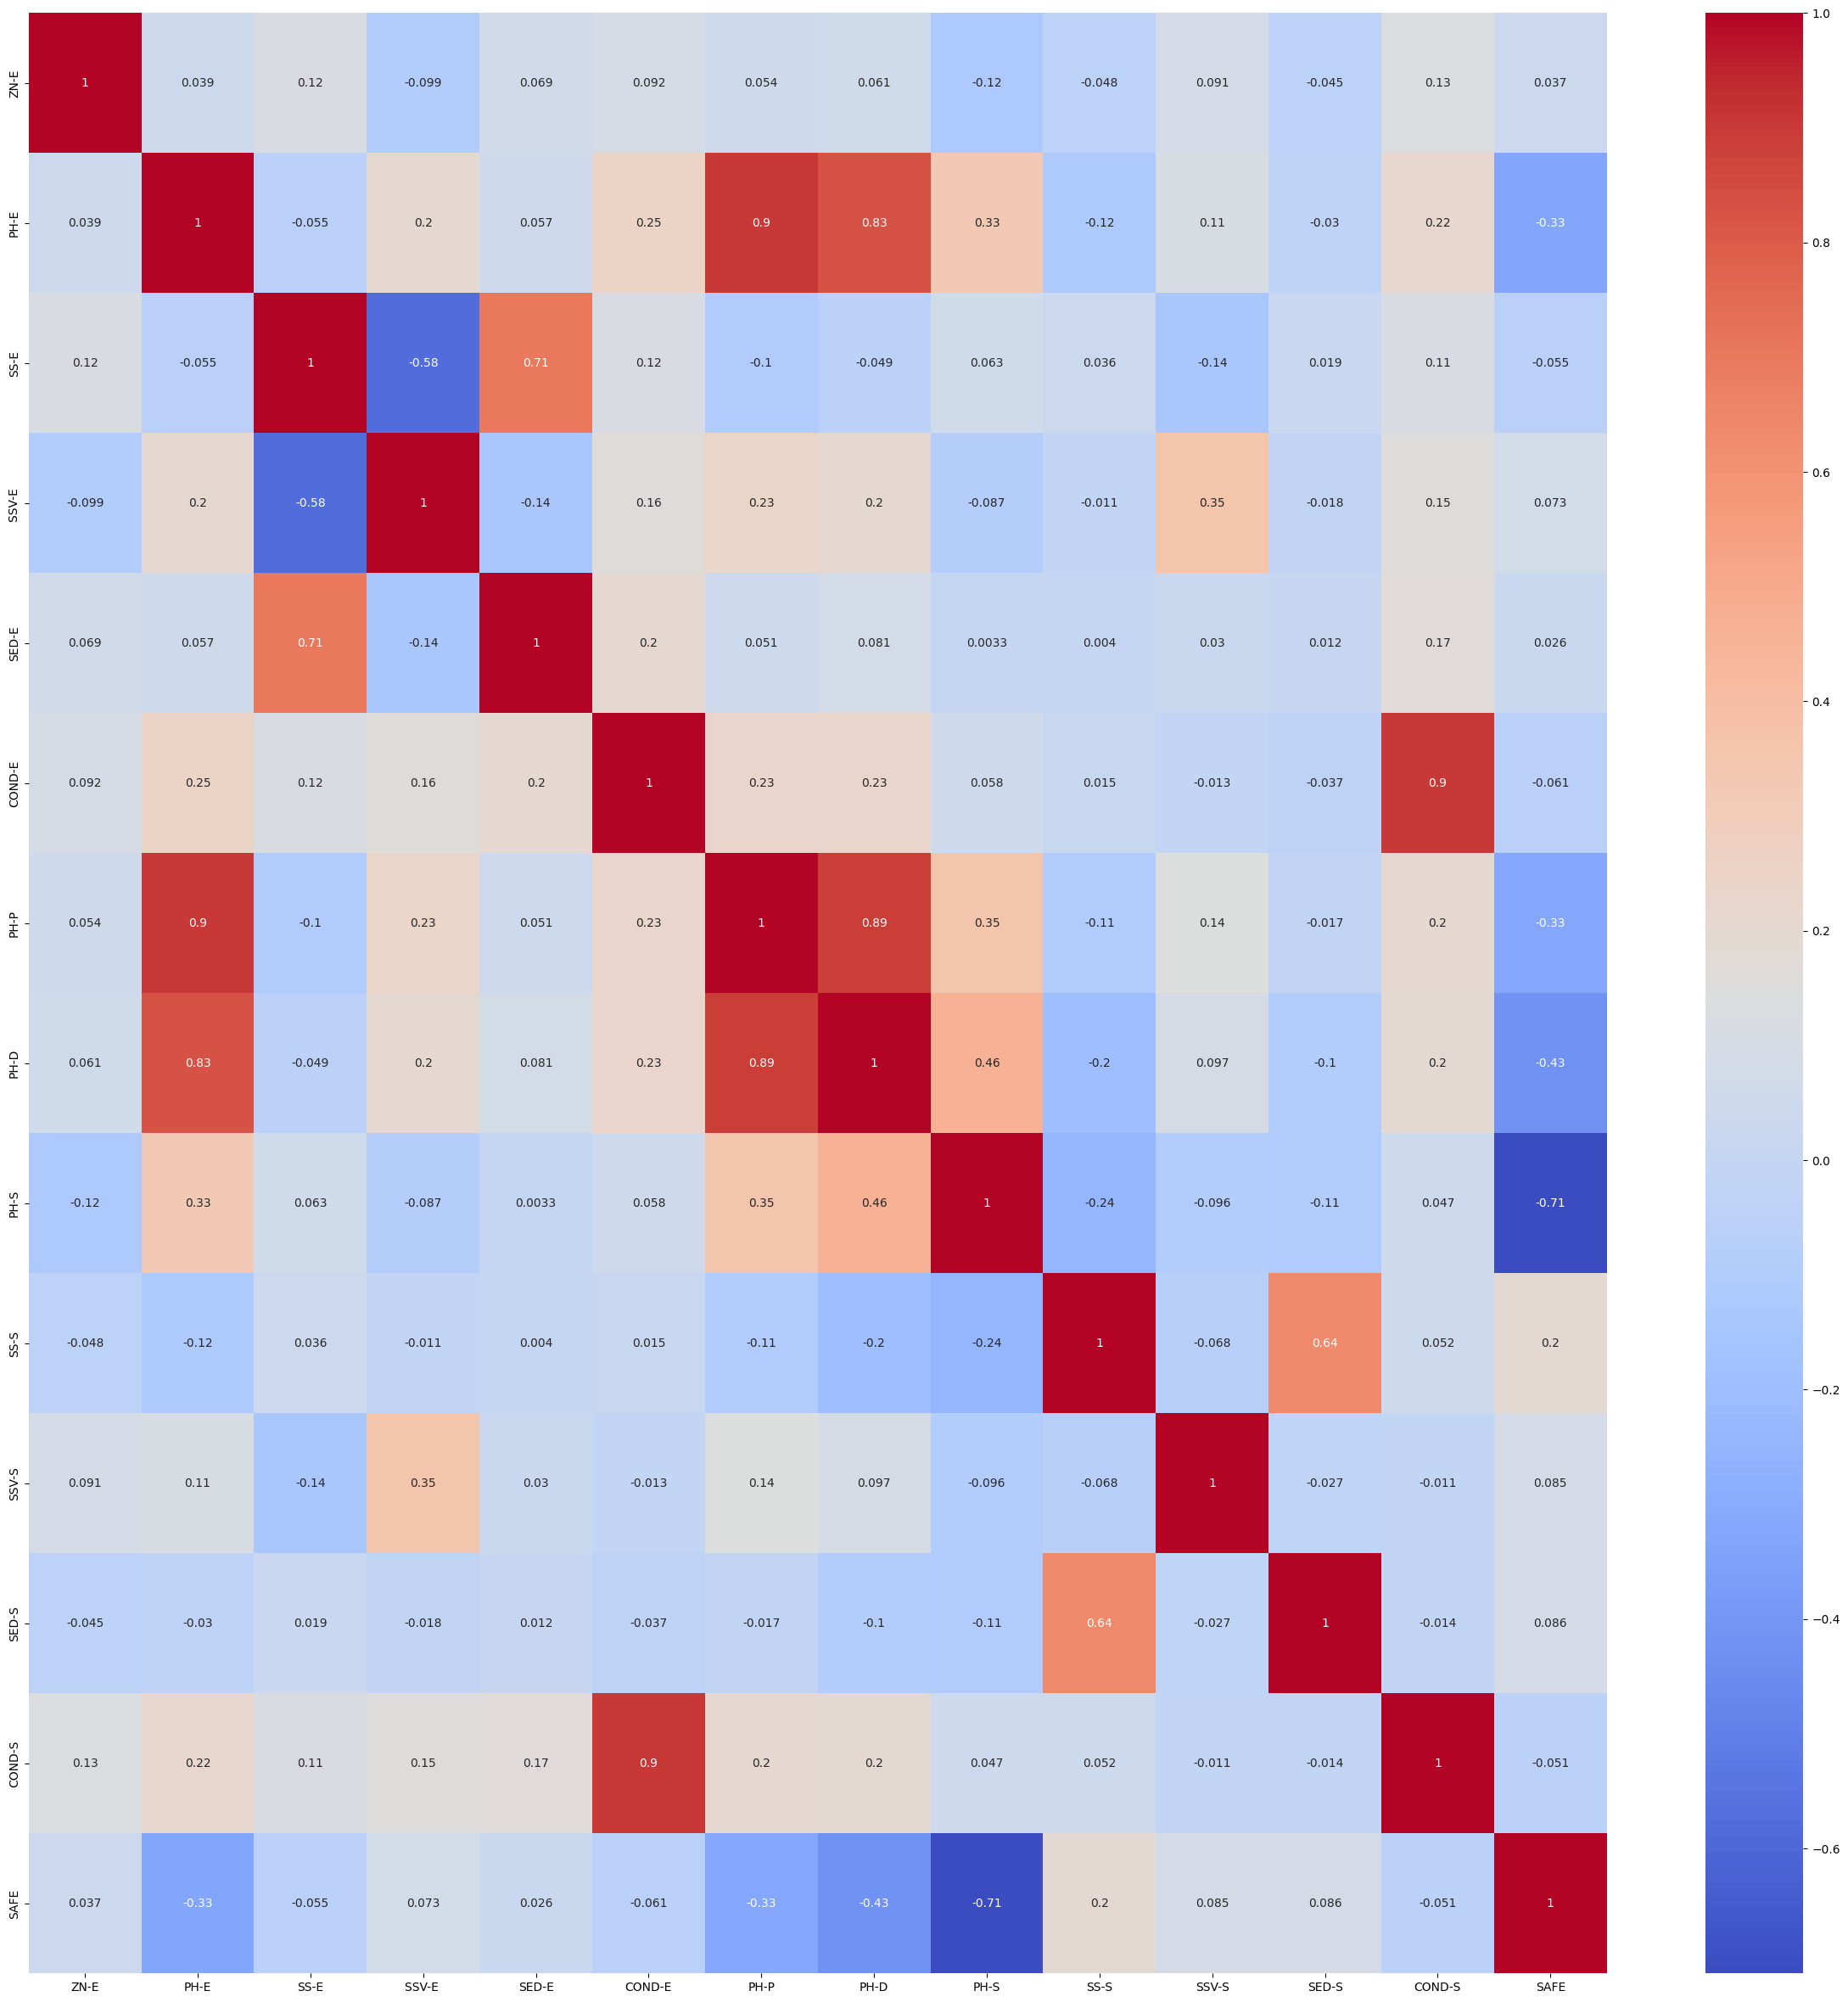

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = df.corr()

# set the figure size
plt.figure(figsize=(30, 30))

# create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()

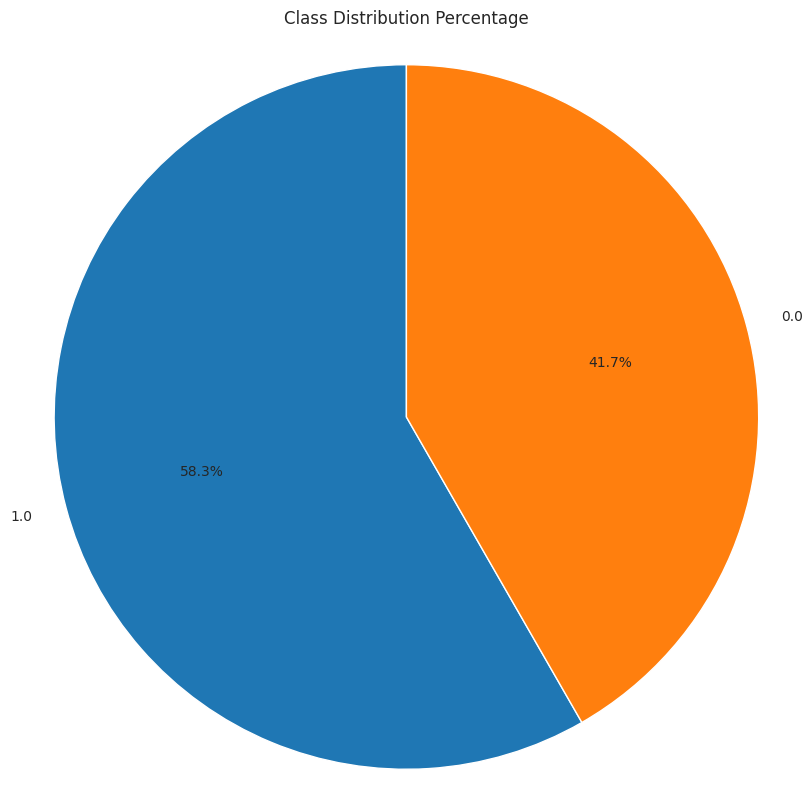

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get class counts
class_counts = df['SAFE'].value_counts()

# Create pie chart
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Percentage')
plt.axis('equal')
plt.show()


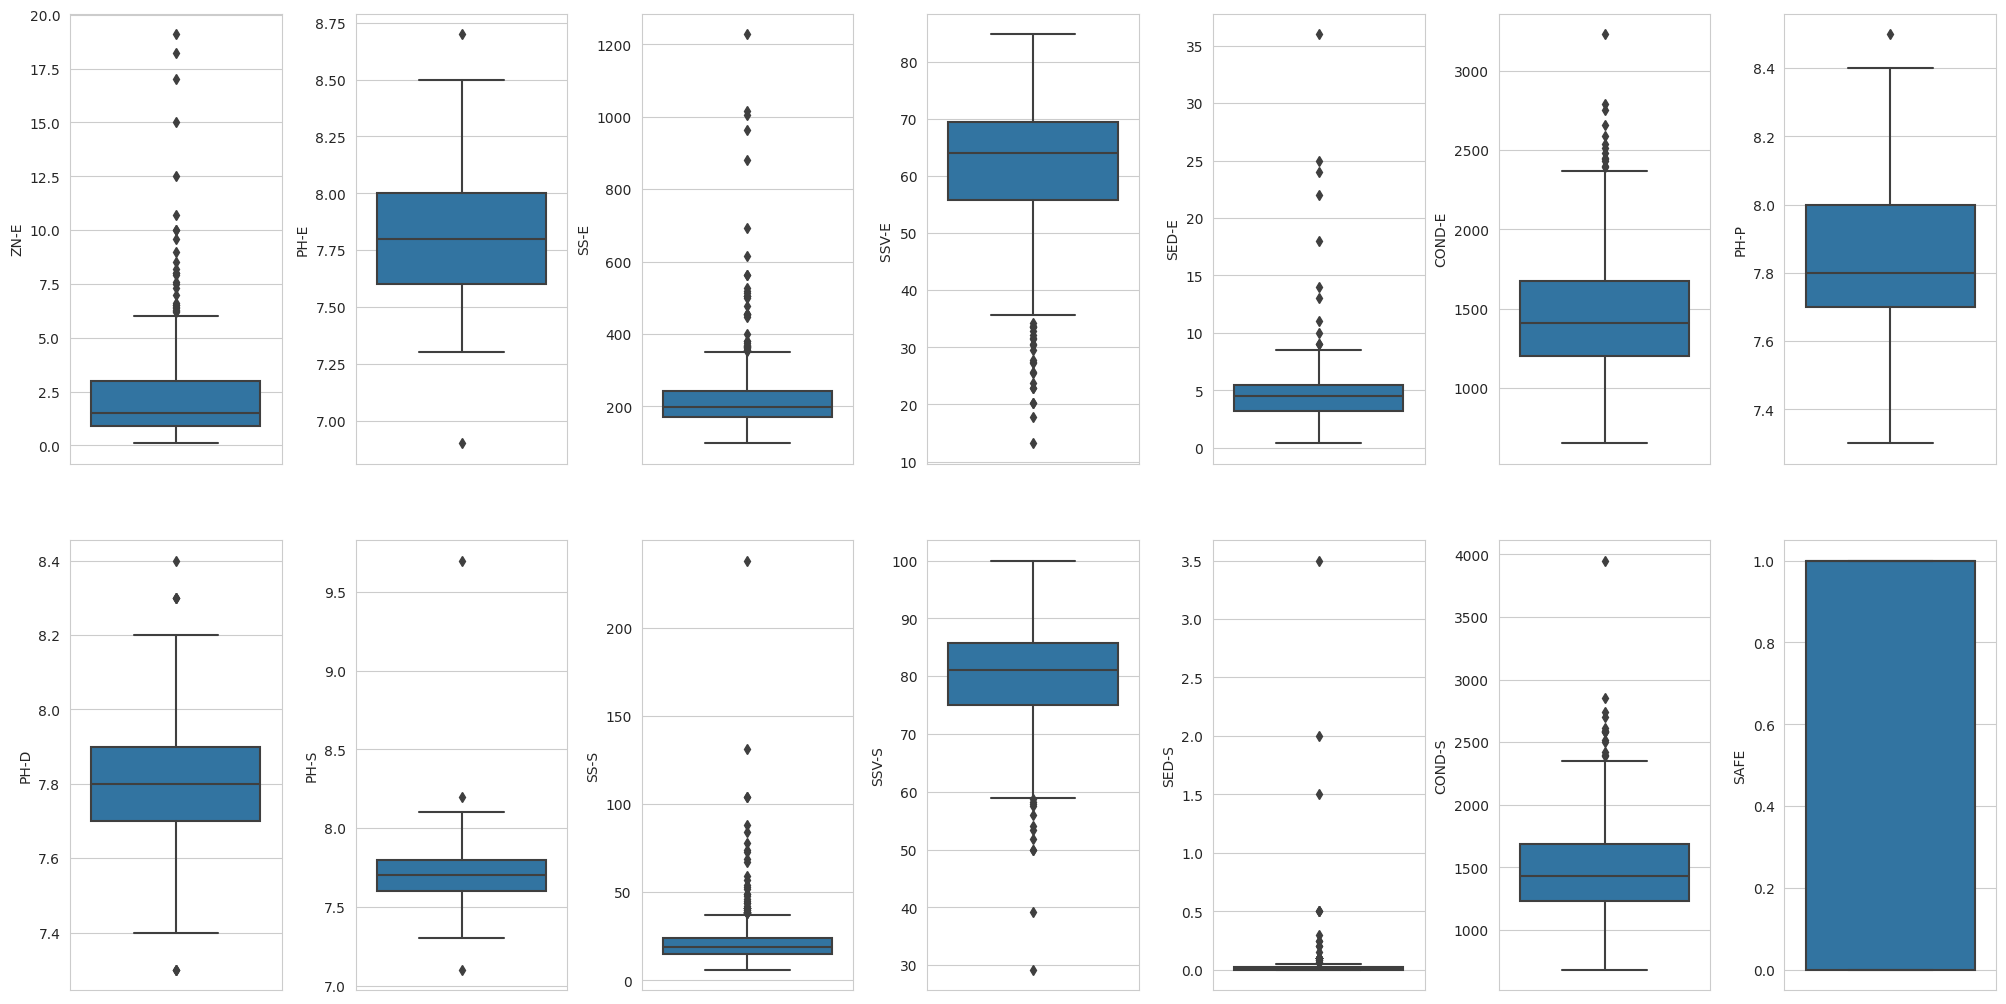

In [14]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [15]:
df_norm = (df-df.min())/ (df.max() - df.min())
df_norm.head()

,ZN-E,PH-E,SS-E,SSV-E,SED-E,COND-E,PH-P,PH-D,PH-S,SS-S,SSV-S,SED-S,COND-S,SAFE
1,0.442105,0.333333,0.125664,0.583799,0.095506,0.169058,0.166667,0.181818,0.000000,0.047414,0.916667,0.000000,0.165289,1.0
3,0.073684,0.500000,0.060177,0.741620,0.115169,0.565723,0.500000,0.545455,0.076923,0.064655,0.731638,0.005714,0.403122,1.0
4,0.057895,0.277778,0.136283,0.668994,0.185393,0.341993,0.083333,0.090909,0.076923,0.060345,0.752825,0.000000,0.220080,1.0
5,0.100000,0.388889,0.079646,0.662011,0.115169,0.252036,0.250000,0.272727,0.076923,0.060345,0.576271,0.000000,0.177227,1.0
6,0.178947,0.333333,0.359292,0.446927,0.193820,0.141528,0.166667,0.181818,0.076923,0.081897,0.604520,0.014286,0.147230,1.0


In [16]:
from sklearn.model_selection import train_test_split
x= df.drop(columns=['SAFE'],axis=1)
y= df['SAFE']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [17]:
#model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
#score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [19]:
import pandas as pd

models = [("LR", LogisticRegression(max_iter=1000)),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("GNB", GaussianNB()),("Ridge", RidgeClassifier())]

results = []
names = []
finalResults = []

for name, model in models:
    model.fit(x_train, y_train)
    model_results = model.predict(x_test)
    score = precision_score(y_test, model_results, average='macro')*100
    results.append(score)
    names.append(name)
    finalResults.append((name, score))
    
finalResults.sort(key=lambda k: k[1], reverse=True)

# Create a data frame from the final results
finalResults = pd.DataFrame(finalResults, columns=['Model', 'Precision Score'])

finalResults


,Model,Precision Score
0,Ridge,90.614035
1,GNB,78.594470
2,LR,66.348974
3,KNN,47.313297


HYPE PARAMETER TUNING

In [20]:
moelel_params= {
'Ridge':{
    'model': RidgeClassifier(),
    'params':{
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000, 5000]
    }
},
'Gausian Naive bayes' : {
    'model' : GaussianNB(),
    'params' : {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    }
}
}

In [21]:
score=[]

#cm=Confusion Matrix
#acc=Accuracy
#auc=Area Under Curve
acc_list = []
auc_list = []
cm_list = []

for model_name, mp in moelel_params.items():
    
    #creating the model
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter = 100, cv = 5, verbose=1, random_state=None,
     n_jobs = -1, return_train_score=False)
    
    #fitting the train dataset into the model
    clf.fit(x_train, y_train)
    
    #predict the test data set using trained model
    y_pred = clf.predict(x_test)
    
    #finding the accuracy, AUC and Confussion Matrix of the model
    acc_list.append(accuracy_score(y_test,y_pred)*100)
    fpr, tpr, _threshold = roc_curve(y_test, y_pred)
    auc_list.append(round(auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    
    
    score.append ({
        'Model': model_name,
        'Best Score': clf.best_score_,
        'Best Params': clf.best_params_,
    }
)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


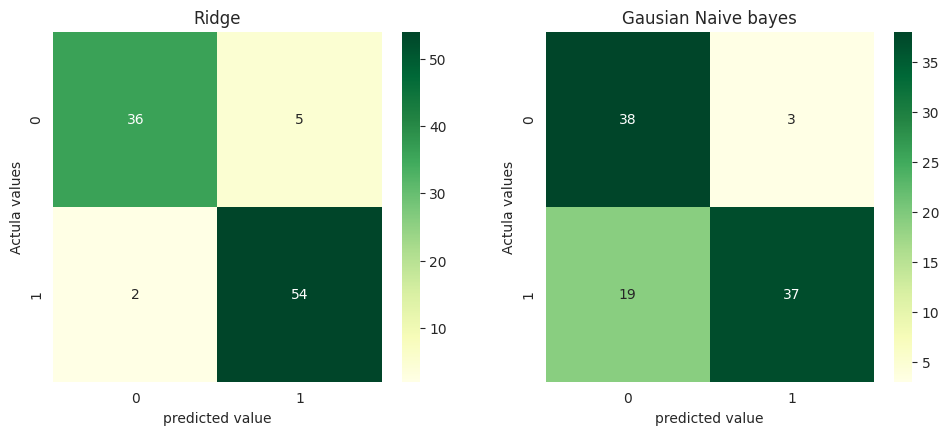

In [22]:
## plot confusion matrix
import seaborn as sb 
fig= plt.figure(figsize=(18,10))

a= pd.DataFrame(score,columns=['Model'])
a= a['Model']

for i in range(len(cm_list)):
    cm = cm_list[i]
    model = a[i]
    sub = fig.add_subplot(2, 3 ,i+1).set_title(model)
    cm_plot = sb.heatmap(cm, annot=True,cmap='YlGn')
    cm_plot.set_xlabel('predicted value')
    cm_plot.set_ylabel('Actula values')

In [23]:
pd.set_option("display.max_colwidth", -1)
scores= pd.DataFrame(score,columns=['Model','Best Score','Best Params'])
acc_auc=pd.DataFrame({'Accuracy':acc_list, 'AUC':auc_list})

#concat both the dataframe
result = pd.concat([scores, acc_auc], axis=1, join='inner')

# sort Best Accuracy in an decending order
result.sort_values(by=['Best Score'], inplace=True, ascending=False)

result


,Model,Best Score,Best Params,Accuracy,AUC
0,Ridge,0.937662,"{'solver': 'svd', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.001}",92.783505,0.92
1,Gausian Naive bayes,0.766234,{'var_smoothing': 1e-08},77.319588,0.79


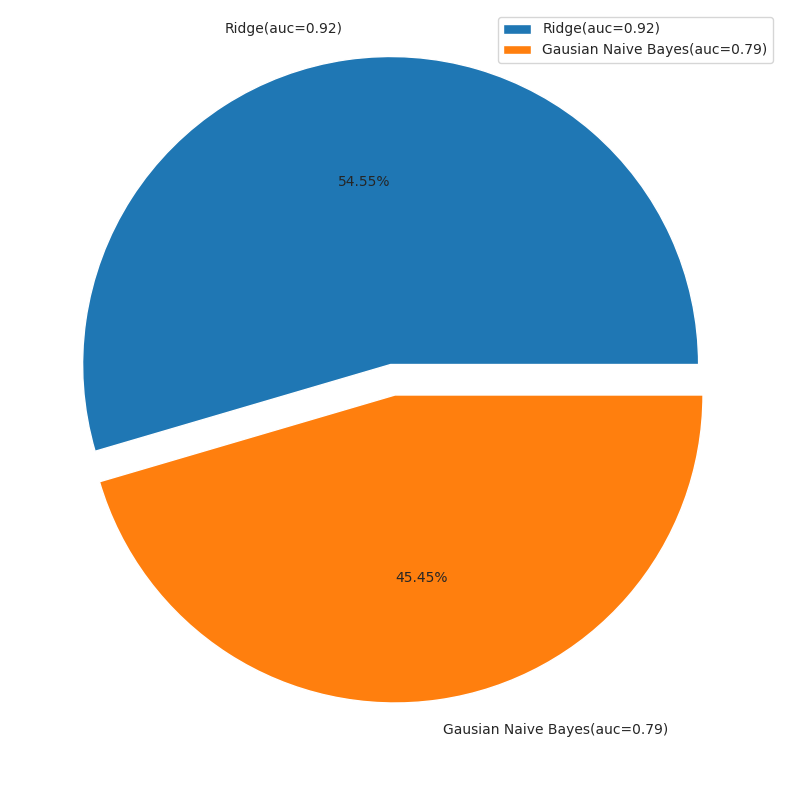

In [24]:
plt.figure(figsize=(10,10))
model_and_auc = ['Ridge(auc=0.92)', 'Gausian Naive Bayes(auc=0.79)']
plt.pie(acc_list,labels=model_and_auc,explode = [0.1,0],autopct="%.2f%%")
plt.legend(loc='upper right')
plt.show()